# Calorie-Based Food  Recommendation

* The Calorie-Based Indian Food Recommendation System is a data-driven solution designed to provide users with personalized food recommendations from Indian cuisine based on their specified calorie preferences. The system utilizes nutritional information from the ind-nutrient-api to suggest food options that align with the user's desired calorie intake.

### Importing required libraries

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import warnings
warnings.filterwarnings('ignore')

### Fetching data from 'indnutrientsapi'

In [2]:
df_json = pd.read_json('https://indnutrientsapi.tech/food')
df_json.head()

,count,food
0,497,"{'_id': '646e44df0e77ec175b88cf32', 'food_name..."
1,497,"{'_id': '646e44df0e77ec175b88cf41', 'food_name..."
2,497,"{'_id': '646e44df0e77ec175b88cf48', 'food_name..."
3,497,"{'_id': '646e44df0e77ec175b88cf4f', 'food_name..."
4,497,"{'_id': '646e44df0e77ec175b88cf56', 'food_name..."


In [3]:
#checking data in food 0th record
df_json['food'][0]['food_name']

'Aloo Paratha'

In [4]:
#checking data in food nutrition in 0th record
df_json['food'][0]['food_nutrition']

[{'nutrient_name': 'carbohydrates', 'value': 47.72, 'unit': 'g'},
 {'nutrient_name': 'fat', 'value': 13.45, 'unit': 'g'},
 {'nutrient_name': 'protein', 'value': 5.94, 'unit': 'g'}]

In [5]:
#loading url to repoanse

# https://rapidapi.com/ind-nutrient-api-ind-nutrient-api-default/api/ind-nutrient-api1
response = requests.get('https://indnutrientsapi.tech/food')
response

<Response [200]>

### Loading data to dataframe

In [6]:
#loading data in 'response' to dataframe

pd.DataFrame(response.json()['food'])

,_id,food_name,quantity,calories,uri,type,type_uri,core,core_uri,food_nutrition
0,646e44df0e77ec175b88cf32,Aloo Paratha,1 paratha,330,https://indnutrientsapi.tech/food/name/Aloo-Pa...,Vegetarian,https://indnutrientsapi.tech/food?type=Vegetarian,Aloo,https://indnutrientsapi.tech/food?core=Aloo,"[{'nutrient_name': 'carbohydrates', 'value': 4..."
1,646e44df0e77ec175b88cf41,Aloo Matar,1 serving (125 g),123,https://indnutrientsapi.tech/food/name/Aloo-Matar,Vegetarian,https://indnutrientsapi.tech/food?type=Vegetarian,Aloo,https://indnutrientsapi.tech/food?core=Aloo,"[{'nutrient_name': 'carbohydrates', 'value': 2..."
2,646e44df0e77ec175b88cf48,Aloo Tikki,1 serving (125 g),111,https://indnutrientsapi.tech/food/name/Aloo-Tikki,Vegetarian,https://indnutrientsapi.tech/food?type=Vegetarian,Aloo,https://indnutrientsapi.tech/food?core=Aloo,"[{'nutrient_name': 'carbohydrates', 'value': 1..."
3,646e44df0e77ec175b88cf4f,Aloo Palak,1 serving (125 g),116,https://indnutrientsapi.tech/food/name/Aloo-Palak,Vegetarian,https://indnutrientsapi.tech/food?type=Vegetarian,Aloo,https://indnutrientsapi.tech/food?core=Aloo,"[{'nutrient_name': 'carbohydrates', 'value': 1..."
4,646e44df0e77ec175b88cf56,Aloo Gosht,1 serving (86 g),118,https://indnutrientsapi.tech/food/name/Aloo-Gosht,Vegetarian,https://indnutrientsapi.tech/food?type=Vegetarian,Aloo,https://indnutrientsapi.tech/food?core=Aloo,"[{'nutrient_name': 'carbohydrates', 'value': 5..."
...,...,...,...,...,...,...,...,...,...,...
492,646e49b2e0f8f521e34140da,Instant Tea Dry Sweetened Powdered,"1 tsp, dry",4,https://indnutrientsapi.tech/food/name/Instant...,Vegetarian,https://indnutrientsapi.tech/food?type=Vegetarian,Tea,https://indnutrientsapi.tech/food?core=Tea,"[{'nutrient_name': 'carbohydrates', 'value': 0..."
493,646e49b2e0f8f521e34140fd,Green Tea,1 cup (250 ml),0,https://indnutrientsapi.tech/food/name/Green-Tea,Vegetarian,https://indnutrientsapi.tech/food?type=Vegetarian,Tea,https://indnutrientsapi.tech/food?core=Tea,"[{'nutrient_name': 'carbohydrates', 'value': 0..."
494,646e49b2e0f8f521e34140e1,Green Tea Ice Tea,1 can (330 ml),96,https://indnutrientsapi.tech/food/name/Green-T...,Vegetarian,https://indnutrientsapi.tech/food?type=Vegetarian,Tea,https://indnutrientsapi.tech/food?core=Tea,"[{'nutrient_name': 'carbohydrates', 'value': 2..."
495,646e49b4e0f8f521e3414106,Presweetened Leaf Tea With Low Calorie Sweetener,1 teacup (180 ml),5,https://indnutrientsapi.tech/food/name/Preswee...,Vegetarian,https://indnutrientsapi.tech/food?type=Vegetarian,Tea,https://indnutrientsapi.tech/food?core=Tea,"[{'nutrient_name': 'carbohydrates', 'value': 1..."


### Extracting required columns data

In [7]:
#loading required columns only to df
food_df = pd.DataFrame(response.json()['food'])[['food_name', 'quantity', 'calories',  'type','core','food_nutrition']]
food_df.head()

,food_name,quantity,calories,type,core,food_nutrition
0,Aloo Paratha,1 paratha,330,Vegetarian,Aloo,"[{'nutrient_name': 'carbohydrates', 'value': 4..."
1,Aloo Matar,1 serving (125 g),123,Vegetarian,Aloo,"[{'nutrient_name': 'carbohydrates', 'value': 2..."
2,Aloo Tikki,1 serving (125 g),111,Vegetarian,Aloo,"[{'nutrient_name': 'carbohydrates', 'value': 1..."
3,Aloo Palak,1 serving (125 g),116,Vegetarian,Aloo,"[{'nutrient_name': 'carbohydrates', 'value': 1..."
4,Aloo Gosht,1 serving (86 g),118,Vegetarian,Aloo,"[{'nutrient_name': 'carbohydrates', 'value': 5..."


In [8]:
#loading food_nutrion column to separate df called food_nutrition_df
food_nutrition_df = food_df['food_nutrition']
food_nutrition_df.head()

0    [{'nutrient_name': 'carbohydrates', 'value': 4...
1    [{'nutrient_name': 'carbohydrates', 'value': 2...
2    [{'nutrient_name': 'carbohydrates', 'value': 1...
3    [{'nutrient_name': 'carbohydrates', 'value': 1...
4    [{'nutrient_name': 'carbohydrates', 'value': 5...
Name: food_nutrition, dtype: object

In [9]:
#accesing 0th record
food_nutrition_df[0]

[{'nutrient_name': 'carbohydrates', 'value': 47.72, 'unit': 'g'},
 {'nutrient_name': 'fat', 'value': 13.45, 'unit': 'g'},
 {'nutrient_name': 'protein', 'value': 5.94, 'unit': 'g'}]

In [10]:
#accesing 0th record
food_nutrition_df[0][0]

{'nutrient_name': 'carbohydrates', 'value': 47.72, 'unit': 'g'}

In [11]:
#accesing 0th record value
food_nutrition_df[0][0]['value']

47.72

In [12]:
#records in dataframe
len(food_nutrition_df)

497

In [14]:
n = len(food_nutrition_df)

carb = []
fat =[]
prot = []

for i in range(0, n):
    carb.append(food_nutrition_df[i][0]['value'])
    fat.append(food_nutrition_df[i][1]['value'])
    prot.append(food_nutrition_df[i][2]['value'])

In [15]:
food_df['carbohydrates(g)']=carb
food_df['fat(g)']=fat
food_df['protein(g)']=prot

food_df.head()

,food_name,quantity,calories,type,core,food_nutrition,carbohydrates(g),fat(g),protein(g)
0,Aloo Paratha,1 paratha,330,Vegetarian,Aloo,"[{'nutrient_name': 'carbohydrates', 'value': 4...",47.72,13.45,5.94
1,Aloo Matar,1 serving (125 g),123,Vegetarian,Aloo,"[{'nutrient_name': 'carbohydrates', 'value': 2...",20.60,3.70,4.11
2,Aloo Tikki,1 serving (125 g),111,Vegetarian,Aloo,"[{'nutrient_name': 'carbohydrates', 'value': 1...",18.15,4.23,2.38
3,Aloo Palak,1 serving (125 g),116,Vegetarian,Aloo,"[{'nutrient_name': 'carbohydrates', 'value': 1...",17.63,4.81,3.53
4,Aloo Gosht,1 serving (86 g),118,Vegetarian,Aloo,"[{'nutrient_name': 'carbohydrates', 'value': 5...",5.95,7.60,6.76


In [16]:
#dropping column food_nutrition
food_df.drop(columns=['food_nutrition'], inplace=True)

### Exploring the Dataset

In [17]:
food_df.head()

,food_name,quantity,calories,type,core,carbohydrates(g),fat(g),protein(g)
0,Aloo Paratha,1 paratha,330,Vegetarian,Aloo,47.72,13.45,5.94
1,Aloo Matar,1 serving (125 g),123,Vegetarian,Aloo,20.60,3.70,4.11
2,Aloo Tikki,1 serving (125 g),111,Vegetarian,Aloo,18.15,4.23,2.38
3,Aloo Palak,1 serving (125 g),116,Vegetarian,Aloo,17.63,4.81,3.53
4,Aloo Gosht,1 serving (86 g),118,Vegetarian,Aloo,5.95,7.60,6.76


In [18]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   food_name         497 non-null    object 
 1   quantity          497 non-null    object 
 2   calories          497 non-null    int64  
 3   type              497 non-null    object 
 4   core              497 non-null    object 
 5   carbohydrates(g)  497 non-null    float64
 6   fat(g)            497 non-null    float64
 7   protein(g)        497 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 31.2+ KB


In [19]:
food_df.shape

(497, 8)

In [21]:
for feature in food_df:
    print("-"*50)
    print(f"{feature} : {food_df[feature].nunique()}")

--------------------------------------------------
food_name : 489
--------------------------------------------------
quantity : 133
--------------------------------------------------
calories : 261
--------------------------------------------------
type : 2
--------------------------------------------------
core : 16
--------------------------------------------------
carbohydrates(g) : 341
--------------------------------------------------
fat(g) : 356
--------------------------------------------------
protein(g) : 385


In [66]:
food_df['core'].value_counts()

Egg          70
Fish         70
Coffee       65
Tea          65
Chicken      53
Mutton       38
Ice Cream    31
Dal          17
Sabzi        17
Paratha      16
Roti         14
Paneer       13
Aloo         11
Dosa          8
Naan          7
Khichdi       2
Name: core, dtype: int64

# About the dataset


### Dataset Overview:
- The dataset contains information about different food items from Indian cuisine.
- The dataset has a total of 497 entries (rows) and 8 columns.

### Columns in the Dataset:
1. `food_name`: The name of the food item. There are 489 unique food names in the dataset.
2. `quantity`: The quantity or serving size of the food item. There are 133 unique quantities in the dataset.
3. `calories`: The calorie content of the food item. There are 261 unique calorie values in the dataset.
4. `type`: The type of the food item, which indicates whether it is Vegetarian or Non-Vegetarian. There are 2 unique types in the dataset.
5. `core`: The core ingredient or main component of the food item. There are 16 unique core ingredients in the dataset.
6. `carbohydrates(g)`: The amount of carbohydrates in grams present in the food item. There are 341 unique values for carbohydrates.
7. `fat(g)`: The amount of fat in grams present in the food item. There are 356 unique values for fat content.
8. `protein(g)`: The amount of protein in grams present in the food item. There are 385 unique values for protein content.

### Core Ingredient Distribution:
- The 'core' column indicates the main ingredient or component of each food item.
- The most common core ingredients are 'Egg' and 'Fish', each appearing 70 times.
- Other common core ingredients include 'Coffee', 'Tea', 'Chicken', and 'Mutton'.

### Data Types:
- The 'food_name', 'quantity', 'type', and 'core' columns are of object (string) data type.
- The 'calories', 'carbohydrates(g)', 'fat(g)', and 'protein(g)' columns are of numeric data types (int64 or float64).

### Data Quality:
- There are no missing values in the dataset, as indicated by the non-null count for each column.
- The dataset seems to have some duplicated 'food_name' entries, as the number of unique food names is less than the total number of entries (497).

### Dataset Scope:
- The dataset focuses on Indian food items and provides information about their nutritional content, including calories, carbohydrates, fat, and protein.
- The 'core' ingredient information suggests the main ingredient or category of each food item.

### Possible Use Cases:
- The dataset can be used for building recommendation systems, analyzing nutritional content, and understanding the distribution of core ingredients in Indian cuisine.
- It provides a foundation for creating tools to help users make informed food choices based on their dietary preferences and requirements.


In [67]:
# making copy of df

df = food_df.copy()

### Top 5 foods with Maximum and Minimum calories

In [68]:
# Sort the DataFrame by 'calories' in descending order and retrieve the top 5
top_max_calories_foods = df.sort_values(by='calories', ascending=False).head(5)

print("Top 5 foods with maximum calories:")
top_max_calories_foods

Top 5 foods with maximum calories:


,food_name,quantity,calories,type,core,carbohydrates(g),fat(g),protein(g)
33,"Chicken Meat And Skin (roasted, Cooked)","1/2 chicken, bone removed",715,Non Vegetarian,Chicken,0.00,40.66,81.63
181,Egg Salad,1 cup,706,Non Vegetarian,Egg,4.28,67.18,20.42
214,"Egg, Cheese And Steak On Bagel",1 sandwich,661,Non Vegetarian,Egg,57.97,30.28,37.98
223,"Egg, Cheese And Ham On Bagel",1 sandwich,597,Non Vegetarian,Egg,57.18,27.14,30.28
286,"Chum Salmon (drained Solids With Bone, Without...",1 can,520,Non Vegetarian,Fish,0.00,5.48,79.08


In [69]:
# Sort the DataFrame by 'calories' in descending order and retrieve the foods with minimum calories
min_calories_foods = df.sort_values(by='calories', ascending=False).tail(10)

print("foods with minimum calories:")
min_calories_foods

foods with minimum calories:


,food_name,quantity,calories,type,core,carbohydrates(g),fat(g),protein(g)
458,Earl Grey Tea,1 teacup (180 ml),1,Vegetarian,Tea,0.36,0.00,0.00
76,Espresso Coffee,1 espresso cup (60 ml),1,Vegetarian,Coffee,0.00,0.11,0.07
470,"Tea (brewed, With Distilled Water)",100 ml,1,Vegetarian,Tea,0.30,0.00,0.00
483,Rooibos Tea,1 serving (200 ml),0,Vegetarian,Tea,0.00,0.00,0.00
90,Decaffeinated Espresso Coffee,1 coffee cup (180 ml),0,Vegetarian,Coffee,0.00,0.32,0.18
100,"Coffee (espresso Brewed, Decaffeinated)",100 g,0,Vegetarian,Coffee,0.00,0.18,0.10
105,Decaffeinated Coffee (made From Ground),1 mug (240 ml),0,Vegetarian,Coffee,0.00,0.00,0.24
491,Clear Green Tea Mint,100 ml,0,Vegetarian,Tea,0.00,0.00,0.10
493,Green Tea,1 cup (250 ml),0,Vegetarian,Tea,0.00,0.00,0.00
67,Instant Coffee,100 ml,0,Vegetarian,Coffee,0.00,0.00,0.00


### Top 5 foods with Maximum and Minimum carbohydrates(g)

In [70]:
# Sort the DataFrame  and retrieve the foods with maximum carbohydrates
top_max_carbohydrates_foods = df.sort_values(by='carbohydrates(g)', ascending=False).head(5)

print("Top 5 foods with maximum carbohydrates:")
top_max_carbohydrates_foods

Top 5 foods with maximum carbohydrates:


,food_name,quantity,calories,type,core,carbohydrates(g),fat(g),protein(g)
404,Jowar Roti,100 g,348,Vegetarian,Roti,72.88,2.31,10.68
392,Sattu Paratha,1 paratha,395,Vegetarian,Paratha,68.48,8.56,12.26
104,Mocha Coffee,1 medium,394,Vegetarian,Coffee,66.97,9.14,10.94
410,Bajra Roti,100 g,361,Vegetarian,Roti,66.80,5.01,11.92
130,Lentils,100 g,353,Vegetarian,Dal,60.08,1.06,25.80


In [71]:
# Sort the DataFrame by 'carbohydrates(g)' in descending order and retrieve the foods with minimum carbohydrates(g)
min_carbohydrates_foods = df.sort_values(by='carbohydrates(g)', ascending=False).tail(10)

print("foods with minimum carbohydrates(g):")
min_carbohydrates_foods

foods with minimum carbohydrates(g):


,food_name,quantity,calories,type,core,carbohydrates(g),fat(g),protein(g)
18,Roasted Grilled Or Baked Chicken Leg,1 medium,262,Non Vegetarian,Chicken,0.0,15.22,29.34
320,Atlantic Salmon (farmed),100 g,183,Non Vegetarian,Fish,0.0,2.18,19.90
20,Chicken Wing,1 small,81,Non Vegetarian,Chicken,0.0,5.40,7.46
322,Spanish Mackerel,1 fillet,260,Non Vegetarian,Fish,0.0,11.78,36.07
323,Atlantic Pollock (fish),1/2 fillet,178,Non Vegetarian,Fish,0.0,1.89,37.52
324,Seatrout (mixed Species),100 g,104,Non Vegetarian,Fish,0.0,1.01,16.74
21,Roasted Grilled Or Baked Chicken Thigh,1 small,135,Non Vegetarian,Chicken,0.0,8.45,13.67
327,Minced Lamb Or Patty,100 g,281,Non Vegetarian,Mutton,0.0,19.49,24.54
328,Mutton Chop,"1 small (112 g, with bone, raw) (yield after c...",226,Non Vegetarian,Mutton,0.0,17.55,15.86
315,Pacific Rockfish (mixed Species),1 fillet,180,Non Vegetarian,Fish,0.0,3.00,35.81


### Top 5 foods with Maximum and Minimum fat(g)	

In [72]:
# Sort the DataFrame  and retrieve the foods with maximum fat(g)
top_max_fat_foods = df.sort_values(by='fat(g)', ascending=False).head(5)

print("Top 5 foods with maximum fat:")
top_max_fat_foods

Top 5 foods with maximum fat:


,food_name,quantity,calories,type,core,carbohydrates(g),fat(g),protein(g)
181,Egg Salad,1 cup,706,Non Vegetarian,Egg,4.28,67.18,20.42
33,"Chicken Meat And Skin (roasted, Cooked)","1/2 chicken, bone removed",715,Non Vegetarian,Chicken,0.00,40.66,81.63
185,Scrambled Egg Made From Dry Eggs,1 cup,454,Non Vegetarian,Egg,2.63,40.23,19.71
199,Egg Yolk (dried),1 cup of sifted,446,Non Vegetarian,Egg,2.41,37.39,22.95
194,Egg Whole (dried),1 cup of sifted,505,Non Vegetarian,Egg,4.21,34.81,40.25


In [73]:
# Sort the DataFrame by 'carbohydrates(g)' in descending order and retrieve the foods with minimum fat(g)
min_fat_foods = df.sort_values(by='fat(g)', ascending=False).tail(10)

print("foods with minimum fat(g):")
min_fat_foods

foods with minimum fat(g):


,food_name,quantity,calories,type,core,carbohydrates(g),fat(g),protein(g)
446,Tea Unsweetened,1 mug (240 ml),2,Vegetarian,Tea,0.76,0.0,0.02
450,"Tea (instant Powder, Unsweetened, Prepared)",1 cup (240 ml),2,Vegetarian,Tea,0.40,0.0,0.14
452,Instant Honeyed Ginger Tea,1 packet (18 g),48,Vegetarian,Tea,12.00,0.0,0.00
236,Vanilla Ice Creams (fat Free),100 g,138,Vegetarian,Ice Cream,30.06,0.0,4.48
455,Sugar Free Ice Tea,100 ml,5,Vegetarian,Tea,1.00,0.0,0.50
456,Herbal Tea Presweetened With Low Calorie Sweet...,1 mug (240 ml),7,Vegetarian,Tea,1.35,0.0,0.02
458,Earl Grey Tea,1 teacup (180 ml),1,Vegetarian,Tea,0.36,0.0,0.00
461,Tea With Lemon,1 teacup (180 ml),3,Vegetarian,Tea,0.82,0.0,0.18
462,Instant Tea Presweetened With Sugar (made From...,1 mug (240 ml),24,Vegetarian,Tea,5.95,0.0,0.19
496,"Tea (instant Powder, Unsweetened)",1 tsp,2,Vegetarian,Tea,0.41,0.0,0.14


### Top 5 foods with Maximum and Minimum protein(g)

In [74]:
# Sort the DataFrame  and retrieve the foods with maximum protein(g)
top_max_protein_foods = df.sort_values(by='protein(g)', ascending=False).head(5)

print("Top 5 foods with maximum protein(g):")
top_max_protein_foods

Top 5 foods with maximum protein(g):


,food_name,quantity,calories,type,core,carbohydrates(g),fat(g),protein(g)
33,"Chicken Meat And Skin (roasted, Cooked)","1/2 chicken, bone removed",715,Non Vegetarian,Chicken,0.00,40.66,81.63
206,Egg White (dried),100 g,382,Non Vegetarian,Egg,7.80,0.00,81.10
286,"Chum Salmon (drained Solids With Bone, Without...",1 can,520,Non Vegetarian,Fish,0.00,5.48,79.08
220,"Egg Whole (dried, Flakes, Glucose Reduced)",100 g,351,Non Vegetarian,Egg,4.17,0.04,76.92
35,Chicken Marsala,1 serving,357,Non Vegetarian,Chicken,8.72,6.78,56.40


In [75]:
# Sort the DataFrame by 'carbohydrates(g)' in descending order and retrieve the foods with minimum protein(g)
min_protein_foods = df.sort_values(by='protein(g)', ascending=False).tail(10)

print("foods with minimum protein(g):")
min_protein_foods

foods with minimum protein(g):


,food_name,quantity,calories,type,core,carbohydrates(g),fat(g),protein(g)
468,Leaf Tea Unsweetened Decaffeinated,1 teacup (180 ml),2,Vegetarian,Tea,0.53,0.0,0.0
467,Iced Tea Lemon & Rooibos,1 cup (250 ml),75,Vegetarian,Tea,19.30,28.0,0.0
464,Tea,1 serving (250 ml),2,Vegetarian,Tea,0.00,0.0,0.0
438,Decaffeinated Tea Presweetened With Sugar,1 mug (240 ml),47,Vegetarian,Tea,12.56,0.0,0.0
439,Chamomile Tea,1 mug (240 ml),2,Vegetarian,Tea,0.47,0.0,0.0
440,"Herbal Tea (other Than Chamomile, Brewed)",1 cup (240 ml),2,Vegetarian,Tea,0.47,0.0,0.0
452,Instant Honeyed Ginger Tea,1 packet (18 g),48,Vegetarian,Tea,12.00,0.0,0.0
451,Leaf Tea Unsweetened,1 mug (240 ml),2,Vegetarian,Tea,0.71,0.0,0.0
445,Raspberry,100 ml,31,Vegetarian,Tea,7.50,0.0,0.0
458,Earl Grey Tea,1 teacup (180 ml),1,Vegetarian,Tea,0.36,0.0,0.0


### Find maximum and minimum calories for each core category

In [76]:
# Find maximum and minimum calories for each core category
max_calories_idx = df.groupby('core')['calories'].idxmax()
min_calories_idx = df.groupby('core')['calories'].idxmin()

max_calories_foods = df.loc[max_calories_idx, ['core', 'food_name', 'calories']]
min_calories_foods = df.loc[min_calories_idx, ['core', 'food_name', 'calories']]

# Rename columns for clarity
max_calories_foods.rename(columns={'food_name': 'max_caloried_food_name', 'calories': 'max_calories'}, inplace=True)
min_calories_foods.rename(columns={'food_name': 'min_caloried_food_name', 'calories': 'min_calories'}, inplace=True)

# Merge the dataframes to create the final result
result_df = pd.merge(max_calories_foods, min_calories_foods, on='core')

print("DataFrame with core, max_caloried_food_name, max_calories, min_caloried_food_name, min_calories:")
result_df

DataFrame with core, max_caloried_food_name, max_calories, min_caloried_food_name, min_calories:


,core,max_caloried_food_name,max_calories,min_caloried_food_name,min_calories
0,Aloo,Aloo Paratha,330,Aloo Beans,92
1,Chicken,"Chicken Meat And Skin (roasted, Cooked)",715,Smoked Chicken Breast,28
2,Coffee,Kit Kat Caramelized Hazelnut,519,Instant Coffee,0
3,Dal,Lentils,353,Curry Dhal Soup,82
4,Dosa,Paneer Dosa,174,Neer Dosa,76
5,Egg,Egg Salad,706,Quail Egg,14
6,Fish,"Chum Salmon (drained Solids With Bone, Without...",520,Sardines,10
7,Ice Cream,Ice Cream Sundae (with Whipped Cream),424,Ice Cream Cones (cake Or Wafer Type),17
8,Khichdi,Sabudana Khichdi,199,Khichdi,175
9,Mutton,Mutton Style Curry Pie,445,Button Mushroom,22


### plotting core ingredients

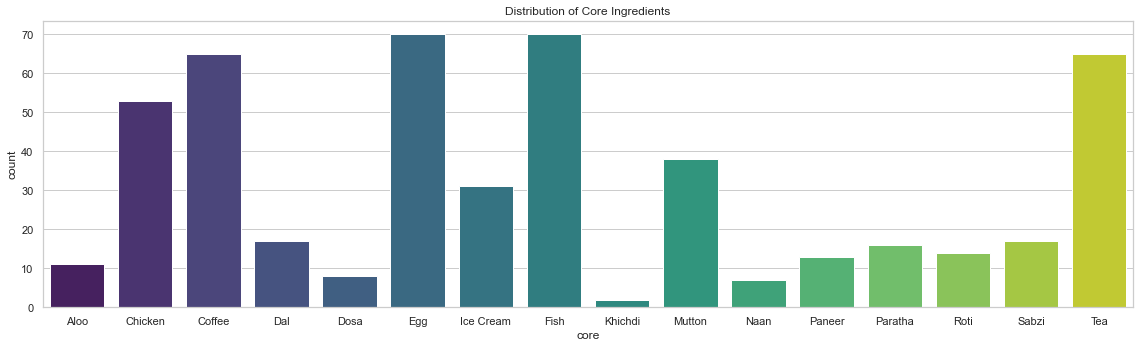

In [77]:
# Create an improved count plot using Seaborn
plt.figure(figsize=(16, 5))
sns.set(style="whitegrid")
sns.countplot(x='core', data=df, palette='viridis')
plt.title("Distribution of Core Ingredients")
#plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

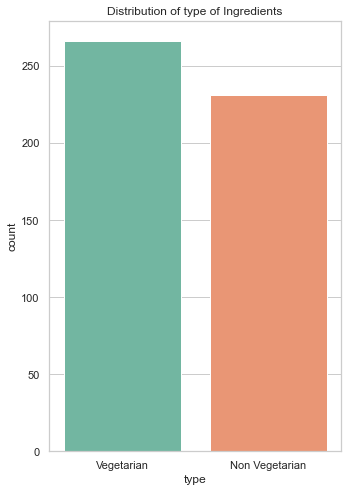

In [78]:
# Create an improved count plot using Seaborn
plt.figure(figsize=(5, 7))
sns.set(style="whitegrid")
sns.countplot(x='type', data=df, palette='Set2')
plt.title("Distribution of type of Ingredients")
#plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Recommendations

In [81]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
import pickle

# Convert categorical features to numerical using one-hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[['type', 'core']])

# Combine all features into a feature matrix
features = df[['calories']]
features = pd.concat([features, pd.DataFrame(encoded_features)], axis=1)

# Calculate cosine similarity between food items
cosine_sim = cosine_similarity(features, features)

# Function to get top N food recommendations based on given features
def get_food_recommendations(query_type, query_core, query_calories, top_n=5):
    query_encoded = encoder.transform([[query_type, query_core]])
    query_features = [query_calories] + list(query_encoded[0])
    
    similarity_scores = cosine_similarity([query_features], features)
    similar_food_indices = similarity_scores[0].argsort()[-top_n:][::-1]
    similar_food_info = df.iloc[similar_food_indices]
    return similar_food_info

# Example: Get recommendations for a specific set of criteria
query_type = "Vegetarian"
query_core = "Aloo"
query_calories = 150
recommendations = get_food_recommendations(query_type, query_core, query_calories)
print("Recommended foods based on criteria:")
print(recommendations[['food_name', 'quantity', 'calories', 'type', 'core', 'carbohydrates(g)', 'fat(g)', 'protein(g)']])



Recommended foods based on criteria:
      food_name           quantity  calories        type  core  \
5      Dum Aloo  1 serving (125 g)       164  Vegetarian  Aloo   
6  Aloo Baingan              1 cup       190  Vegetarian  Aloo   
1    Aloo Matar  1 serving (125 g)       123  Vegetarian  Aloo   
4    Aloo Gosht   1 serving (86 g)       118  Vegetarian  Aloo   
3    Aloo Palak  1 serving (125 g)       116  Vegetarian  Aloo   

   carbohydrates(g)  fat(g)  protein(g)  
5             24.68    6.96        3.99  
6             25.41   10.20        4.41  
1             20.60    3.70        4.11  
4              5.95    7.60        6.76  
3             17.63    4.81        3.53  


In [82]:
# Example: Get recommendations for a specific set of criteria
query_type = "Vegetarian"
query_core = "Dal"
query_calories = 300
recommendations = get_food_recommendations(query_type, query_core, query_calories)

# Create a new DataFrame to store the recommendations
recommended_df = pd.DataFrame(recommendations)
print("Recommended foods based on criteria:")
recommended_df[['food_name', 'quantity', 'calories', 'type', 'core', 'carbohydrates(g)', 'fat(g)', 'protein(g)']]

Recommended foods based on criteria:


,food_name,quantity,calories,type,core,carbohydrates(g),fat(g),protein(g)
145,Toor Dal,1 cup,296,Vegetarian,Dal,45.35,8.34,14.23
129,Cooked Lentils,1 cup,323,Vegetarian,Dal,36.71,13.25,16.44
139,Dal Dhokli,1 serving (150 g),330,Vegetarian,Dal,52.38,8.70,12.29
137,Masoor Dal,1 cup,347,Vegetarian,Dal,55.99,6.16,18.89
130,Lentils,100 g,353,Vegetarian,Dal,60.08,1.06,25.80


In [84]:
# Save the encoder and recommendation function to a pickled file
with open('recommendation_model.pkl', 'wb') as f:
    pickle.dump((encoder, get_food_recommendations), f)

## Conclusion: 
Leveraging nutritional data sourced from the ind-nutrient-api and employing cosine similarity vector mapping, our recommendation system successfully delivers precise food suggestions. By ensuring accurate and relevant recommendations, we have effectively achieved our intended goal.


### Thank you.